In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bus_stop_data = pd.read_csv('bus_stop_data.csv')
trip_data = pd.read_csv('trip_data.csv')

In [3]:
bus_stop_data.head()

,trip_id,date,bus_stop_id,arrival_time,departure_time,dwell_time
0,1201,2022-10-01,201,04:05:56,04:06:11,0 days 00:00:15
1,1201,2022-10-01,202,04:07:26,04:07:26,0 days 00:00:00
2,1201,2022-10-01,203,04:08:56,04:08:56,0 days 00:00:00
3,1201,2022-10-01,204,04:10:41,04:10:41,0 days 00:00:00
4,1201,2022-10-01,206,04:14:11,04:14:11,0 days 00:00:00


In [4]:
trip_data.head()

,trip_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time
0,1,2021-10-01,07:31:27,08:15:31,BT02,BT01,44.066667,5.466667
1,2,2021-10-01,09:12:10,10:00:55,BT01,BT02,48.750000,2.366667
2,3,2021-10-01,10:42:10,11:32:30,BT02,BT01,50.333333,9.283333
3,4,2021-10-01,12:23:09,13:15:46,BT01,BT02,52.616667,9.183333
4,5,2021-10-01,16:59:16,18:17:15,BT02,BT01,77.983333,25.566667


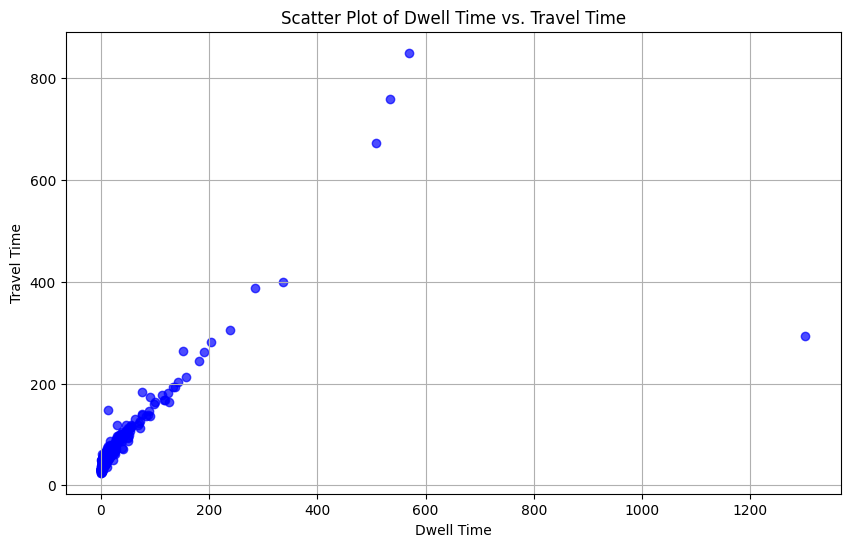

In [6]:
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

plt.scatter(trip_data['dwell_time'], trip_data['travel_time'], c='blue', alpha=0.7)
plt.title('Scatter Plot of Dwell Time vs. Travel Time')
plt.xlabel('Dwell Time')
plt.ylabel('Travel Time')

# Optional: You can add a grid
plt.grid(True)

# Show the plot
plt.show()

In [8]:
# Convert the 'dwell_time' column to minutes
bus_stop_data['dwell_time'] = bus_stop_data['dwell_time'].apply(lambda x: pd.to_timedelta(x).total_seconds() / 60)

In [9]:
bus_stop_data

,trip_id,date,bus_stop_id,arrival_time,departure_time,dwell_time,bus_stop_type
0,1201,2022-10-01,201,04:05:56,04:06:11,0.250000,Starting with 2
1,1201,2022-10-01,202,04:07:26,04:07:26,0.000000,Starting with 2
2,1201,2022-10-01,203,04:08:56,04:08:56,0.000000,Starting with 2
3,1201,2022-10-01,204,04:10:41,04:10:41,0.000000,Starting with 2
4,1201,2022-10-01,206,04:14:11,04:14:11,0.000000,Starting with 2
...,...,...,...,...,...,...,...
121,1210,2022-10-04,107,11:07:28,11:07:43,0.250000,Starting with 1
122,1210,2022-10-04,109,11:09:46,11:10:11,0.416667,Starting with 1
123,1210,2022-10-04,110,11:12:54,11:13:20,0.433333,Starting with 1
124,1210,2022-10-04,111,11:17:43,11:17:51,0.133333,Starting with 1


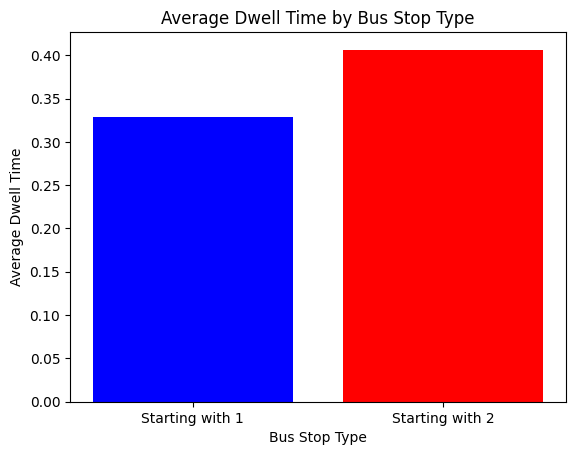

In [10]:


# Create a new column 'bus_stop_type' based on the 'bus_stop_id' value
bus_stop_data['bus_stop_type'] = bus_stop_data['bus_stop_id'].apply(lambda x: 'Starting with 2' if str(x).startswith('2') else 'Starting with 1')

# Group the data by 'bus_stop_type' and calculate the average dwell_time
grouped = bus_stop_data.groupby('bus_stop_type')['dwell_time'].mean().reset_index()

# Create a bar plot with different colors for each 'bus_stop_type'
plt.bar(grouped['bus_stop_type'], grouped['dwell_time'], color=['blue', 'red'])

# Add labels and title
plt.xlabel('Bus Stop Type')
plt.ylabel('Average Dwell Time')
plt.title('Average Dwell Time by Bus Stop Type')

# Show the plot
plt.show()

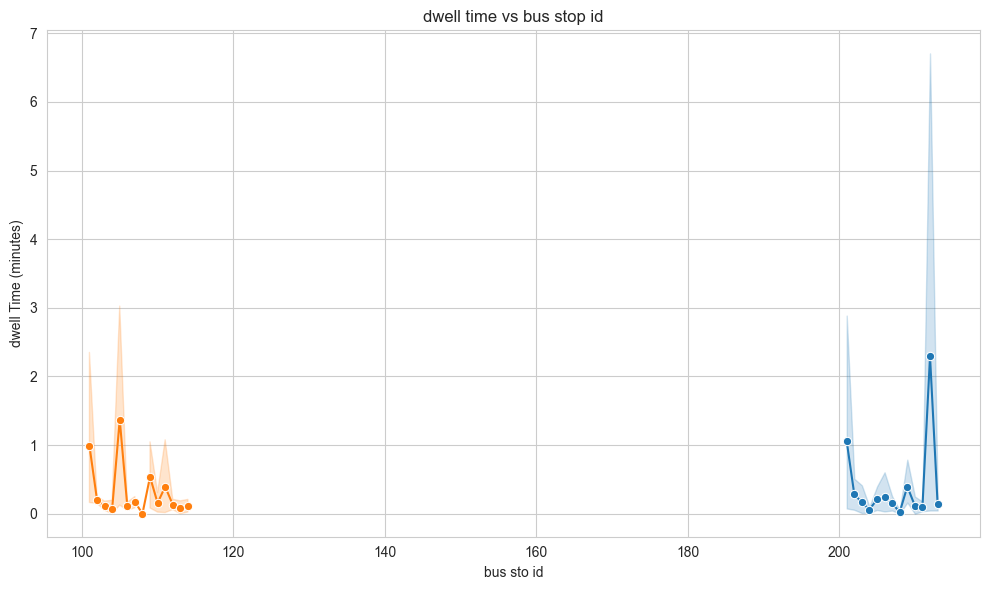

In [15]:
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Plot line graph with different colors for weekends and weekdays
plt.figure(figsize=(10, 6))
sns.lineplot(data=bus_stop_data, x='bus_stop_id', y='dwell_time', hue='bus_stop_type', marker='o', legend=False)
plt.xlabel('bus sto id')
plt.ylabel('dwell Time (minutes)')
plt.title('dwell time vs bus stop id')
plt.tight_layout()
plt.show()

In [16]:
bus_stop_data['day'] = pd.to_datetime(trip_data['date']).dt.day_name()

In [17]:
bus_stop_data

,trip_id,date,bus_stop_id,arrival_time,departure_time,dwell_time,bus_stop_type,day
0,1201,2022-10-01,201,04:05:56,04:06:11,0.250000,Starting with 2,Friday
1,1201,2022-10-01,202,04:07:26,04:07:26,0.000000,Starting with 2,Friday
2,1201,2022-10-01,203,04:08:56,04:08:56,0.000000,Starting with 2,Friday
3,1201,2022-10-01,204,04:10:41,04:10:41,0.000000,Starting with 2,Friday
4,1201,2022-10-01,206,04:14:11,04:14:11,0.000000,Starting with 2,Friday
...,...,...,...,...,...,...,...,...
121,1210,2022-10-04,107,11:07:28,11:07:43,0.250000,Starting with 1,Thursday
122,1210,2022-10-04,109,11:09:46,11:10:11,0.416667,Starting with 1,Friday
123,1210,2022-10-04,110,11:12:54,11:13:20,0.433333,Starting with 1,Friday
124,1210,2022-10-04,111,11:17:43,11:17:51,0.133333,Starting with 1,Friday


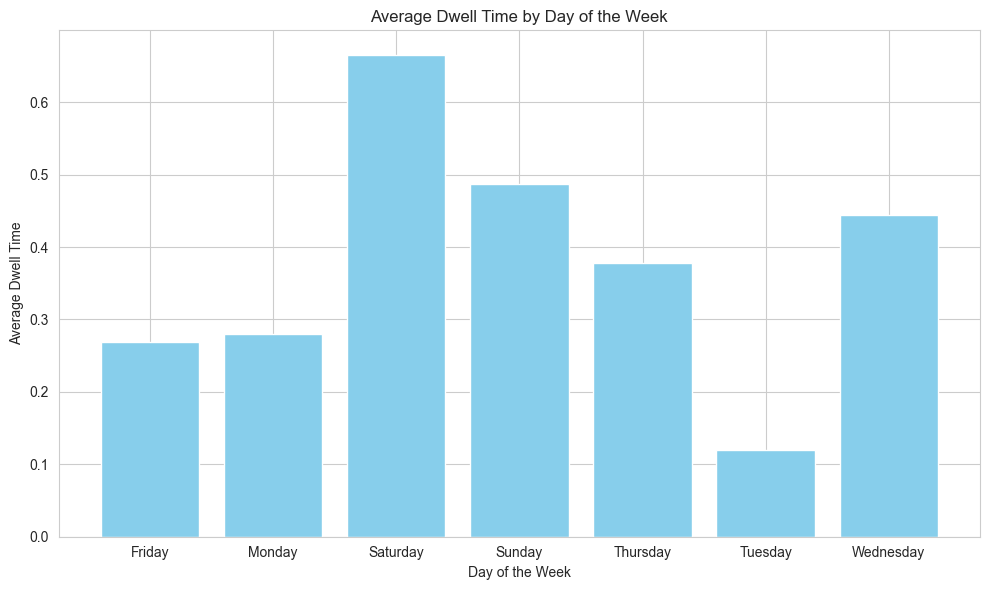

In [18]:
# Group the data by 'day' and calculate the average 'dwell_time'
grouped = bus_stop_data.groupby('day')['dwell_time'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped['day'], grouped['dwell_time'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Dwell Time')
plt.title('Average Dwell Time by Day of the Week')
plt.tight_layout()
plt.show()